In [89]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

In [32]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


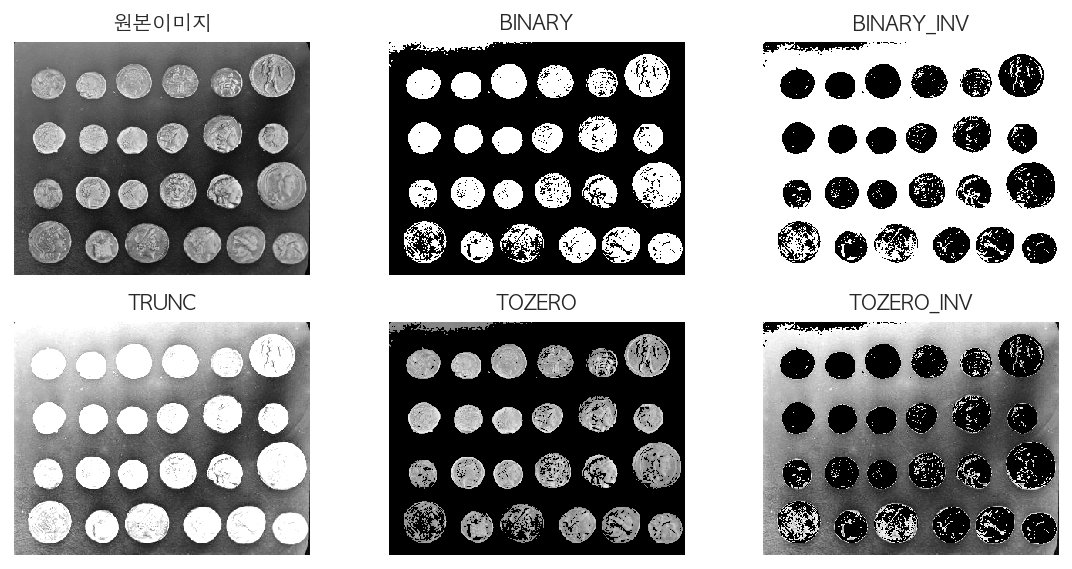

In [5]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2 

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

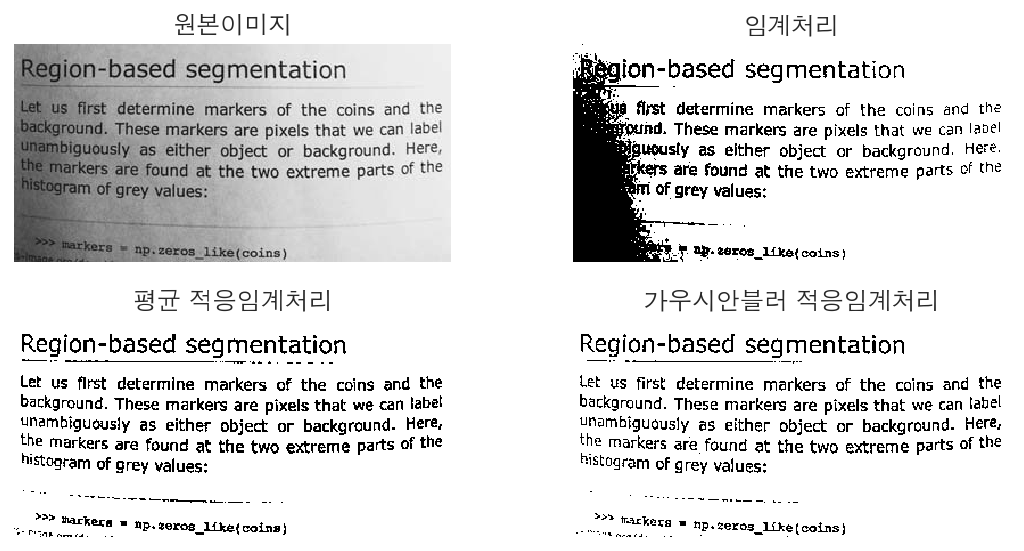

In [6]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 4))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

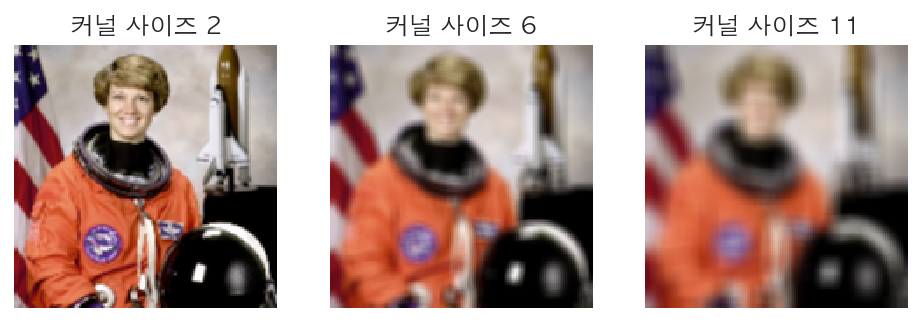

In [7]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 4))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

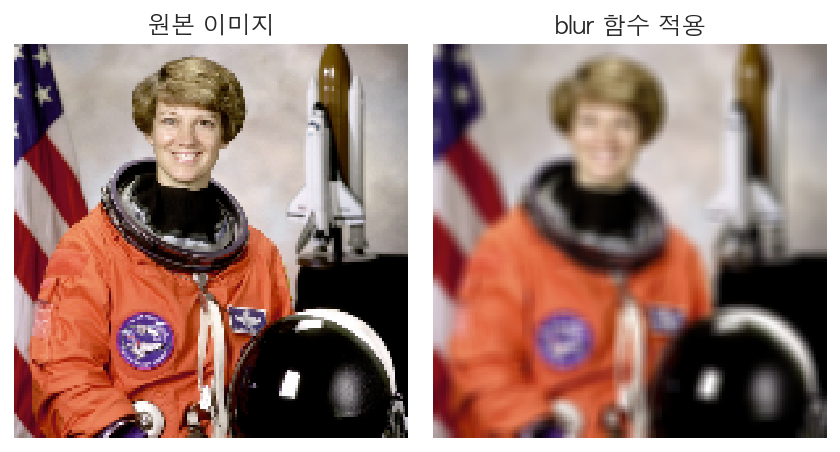

In [43]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

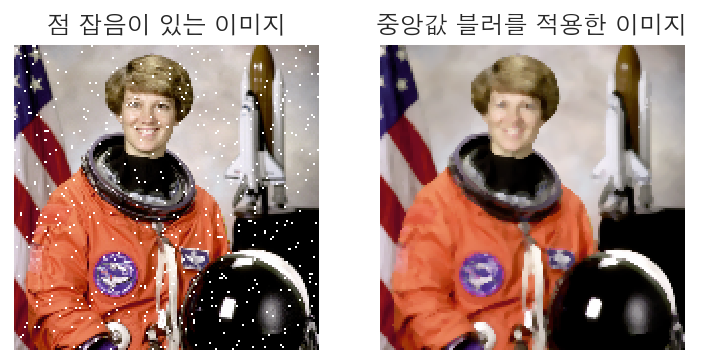

In [8]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()

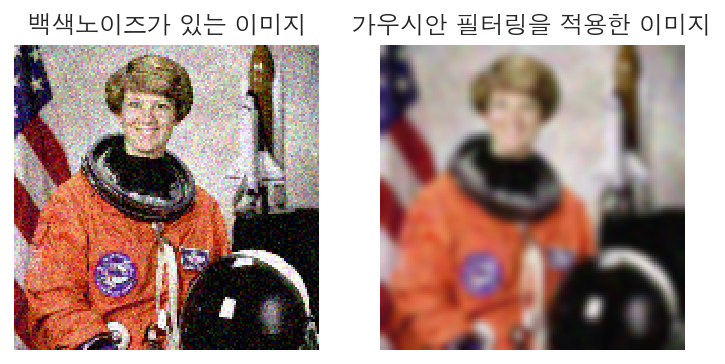

In [9]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

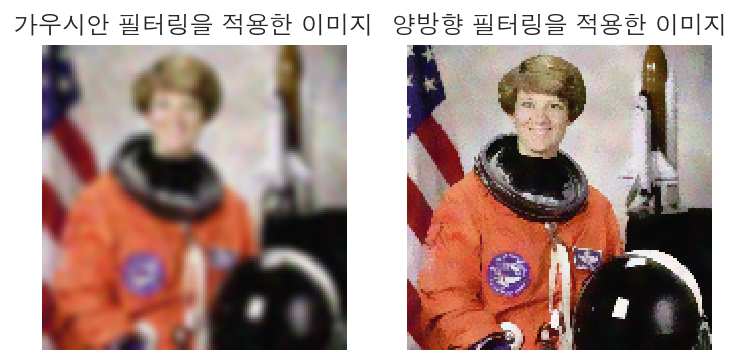

In [10]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

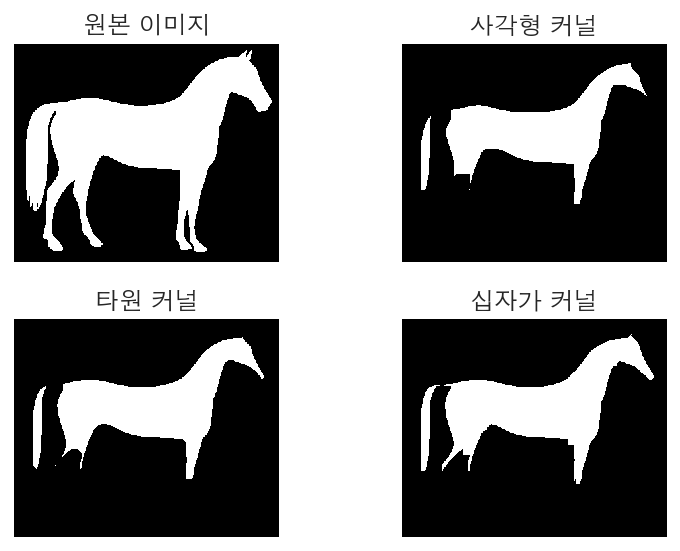

In [12]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

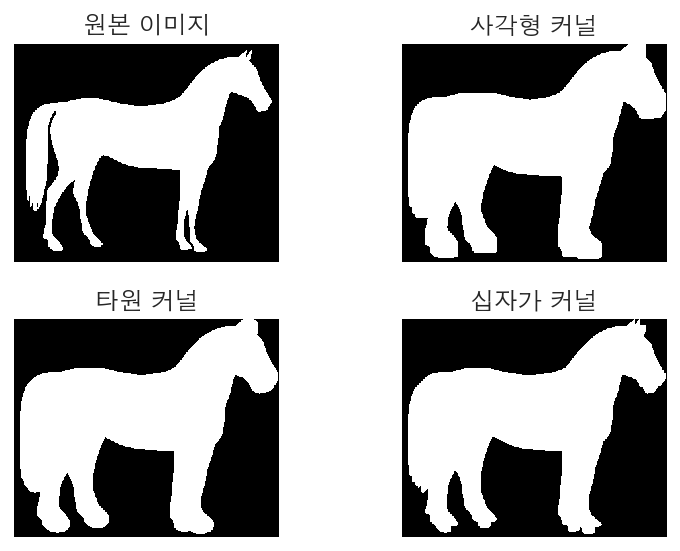

In [13]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

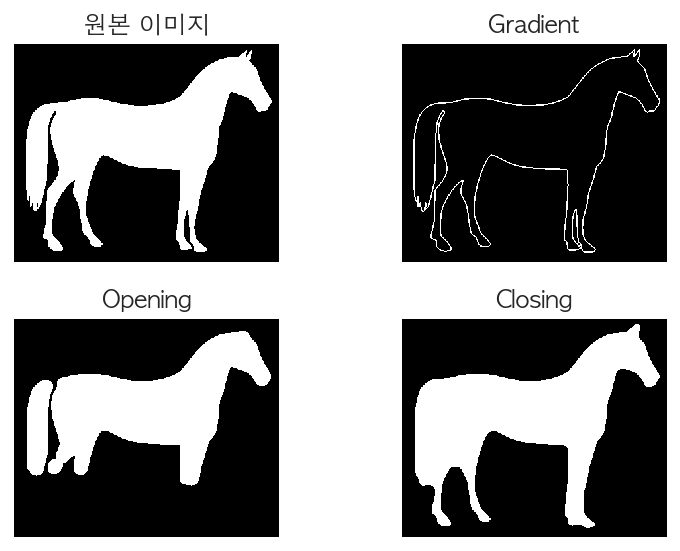

In [14]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

###### 연습 문제
    다음 왼쪽 이미지를 필터링 처리하여 오른쪽 이미지와 같이 종이 부분만을 이진화하여라. 이미지는 다음 명령으로 내려받는다.

In [15]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2020-08-11 10:47:06--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net (datascienceschool.net)... 114.202.2.86
Connecting to datascienceschool.net (datascienceschool.net)|114.202.2.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731251 (2.6M) [image/png]
Saving to: ‘receipt.png’

receipt.png         100%[===================>]   2.60M  1.05MB/s    in 2.5s    

2020-08-11 10:47:08 (1.05 MB/s) - ‘receipt.png’ saved [2731251/2731251]



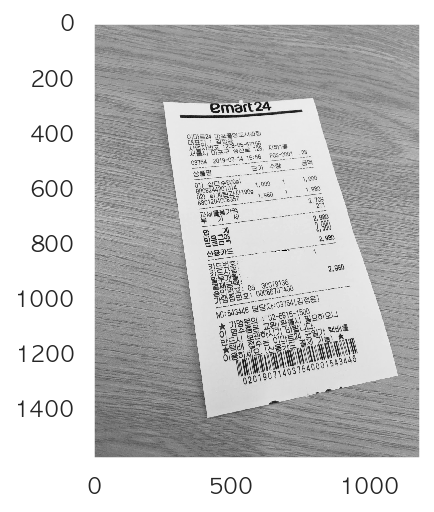

In [42]:
plt.figure(figsize=(4,4))
plt.imshow(img, cmap=plt.cm.gray)
plt.grid(False)
plt.show()

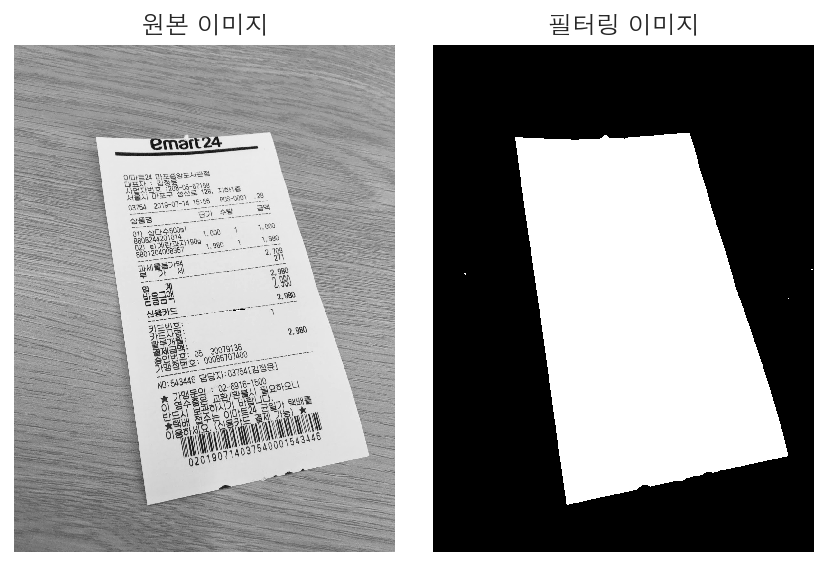

In [88]:
import cv2

img = cv2.imread('./receipt.png') # 데이터 로드
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이톤으로 변환

_, thresh1 = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY) # thresh 설정

thresh1 = cv2.medianBlur(thresh1, 3) # 중앙값 블러

img_result = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
)

# plt.figure(figsize=(3,3))
# plt.imshow(img, cmap=plt.cm.gray)
# plt.axis(False)
# plt.tight_layout()

# plt.figure(figsize=(3,3))
# plt.imshow(img_result, cmap='gray')
# plt.axis(False)
# plt.tight_layout()

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_result, cmap='gray')
plt.title("필터링 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()